### La muy pero muy famosa Red Asia

In [20]:
library(bnlearn)

• D (Dispnea), dificultad respiratoria.

• T (Tuberculosis), tubercolosis a two-level factor with levels yes and no.

• L (Cancer pulmonar), a two-level factor with levels yes and no.

• B (Bronquitis), a two-level factor with levels yes and no.

• A (Visito Asia), a two-level factor with levels yes and no.

• S (Fumador), a two-level factor with levels yes and no.

• X (Radiografía de pecho), a two-level factor with levels yes and no.

• E (tuberculosis versus lung cancer/bronchitis), a two-level factor with levels yes and no.

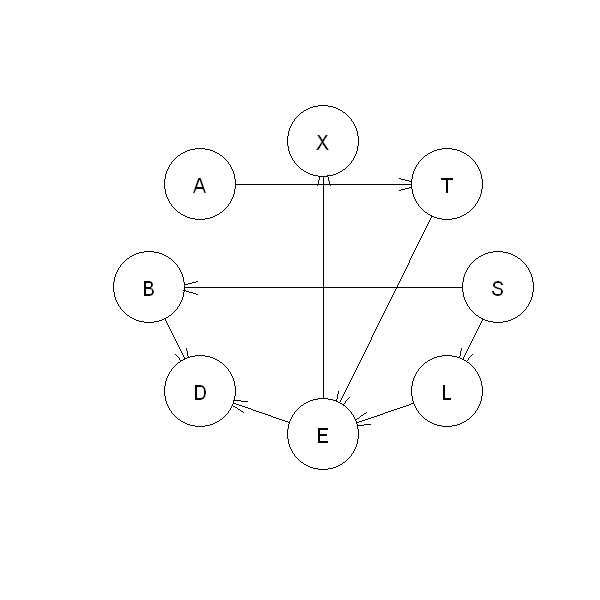

In [168]:
data(asia)
options(repr.plot.width=5, repr.plot.height=5)
dag = model2network("[A][S][T|A][L|S][B|S][D|B:E][E|T:L][X|E]")
plot(dag,col="blue")

In [161]:
print("Visitante a Asia")
round(prop.table(table(asia$A)),digits = 2)
print('Si es fumador')
round(prop.table(table(asia$S)),digits = 2)
print('Tuberculosis dado que visito Asia')
round(prop.table(table(asia$A,asia$T),1),2)
print('Tiene bronquitis dado que fuma')
round(prop.table(table(asia$S,asia$B),1),2)
print('Tiene cancer pulmonar dado que fuma')
round(prop.table(table(asia$S,asia$L),1),2)
print('Gradiografia positiva dado que tiene tuberculosis o cancer')
round(prop.table(table(asia$E,asia$X),1),2)
print('Tiene dipnea dado que tien cancer o tuberculosis o bronquitis')
BED = table(asia$B,asia$E,asia$D) 
round(prop.table(ftable(BED),1),2)
print('Tiene tuberculosisocancer dado que tiene tuberculosis o cancer')
TLE = table(asia$T,asia$L,asia$E) 
round(prop.table(ftable(TLE),1),2)

[1] "Visitante a Asia"



  no  yes 
0.99 0.01 

[1] "Si es fumador"



 no yes 
0.5 0.5 

[1] "Tuberculosis dado que visito Asia"


     
        no  yes
  no  0.99 0.01
  yes 0.95 0.05

[1] "Tiene bronquitis dado que fuma"


     
        no  yes
  no  0.70 0.30
  yes 0.28 0.72

[1] "Tiene cancer pulmonar dado que fuma"


     
        no  yes
  no  0.99 0.01
  yes 0.88 0.12

[1] "Gradiografia positiva dado que tiene tuberculosis o cancer"


     
        no  yes
  no  0.96 0.04
  yes 0.01 0.99

[1] "Tiene dipnea dado que tien cancer o tuberculosis o bronquitis"


           no  yes
                  
no  no   0.90 0.10
    yes  0.28 0.72
yes no   0.21 0.79
    yes  0.15 0.85

[1] "Tiene tuberculosisocancer dado que tiene tuberculosis o cancer"


         no yes
               
no  no    1   0
    yes   0   1
yes no    0   1
    yes   0   1

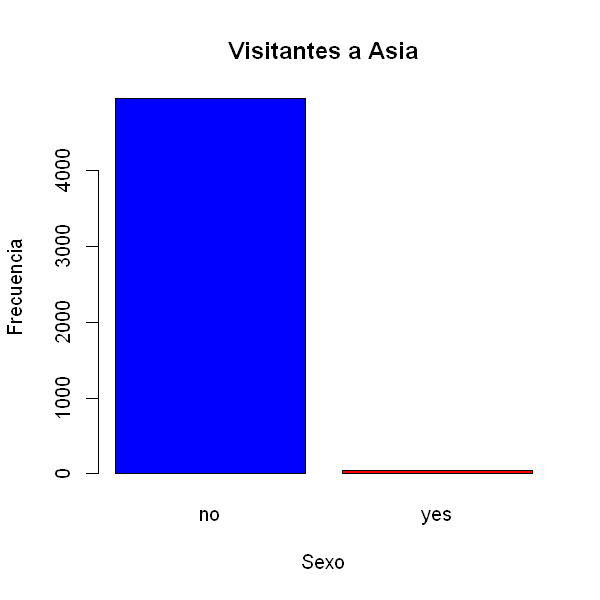

In [92]:
barplot(table(asia$A), col=c("blue","red"),
        xlab="Sexo", ylab="Frecuencia", 
        main="Visitantes a Asia")

In [213]:
yn   = c("SI", "NO")
pA = matrix(c(0.01,0.99),ncol=2,dimnames=list(NULL,yn))
pS = matrix(c(0.5, 0.5), ncol=2,dimnames=list(NULL, yn))
pS

SI,NO
0.5,0.5


In [225]:
pAT = matrix(c(0.99, 0.01,0.95, 0.05),ncol=2, dimnames=list("T"=yn, "A"=yn))
pBS = matrix(c(0.70 , 0.3, 0.28, 0.72),ncol=2, dimnames=list("B"=yn, "S"=yn))
pLS = matrix(c(0.99 , 0.01, 0.88, 0.12),ncol=2, dimnames=list("L"=yn, "S"=yn))
pEX=  matrix(c(0.96 , 0.04, 0.01, 0.99),ncol=2, dimnames=list("X"=yn, "E"=yn))
pAT

,SI,NO
SI,0.99,0.95
NO,0.01,0.05


In [236]:
# Dado que no existe los arreglos en 3D se van a crear para tener [FPA|CGA:CJA] y [SMA|FPA:FSA] 
pBED = c(0.90, 0.10 , 0.28,0.72,  0.21, 0.79,  0.15, 0.85)
dim(pBED) =c(2,2,2)
dimnames(pBED)=list("D"=yn, "B"=yn, "E"=yn)
pTLE = c(1, 0, 0, 1, 0, 1, 0, 1)
dim(pTLE) = c(2, 2, 2)
dimnames(pTLE)=list("E"=yn, "T"=yn, "L"=yn)
print(pTLE)

, , L = SI

    T
E    SI NO
  SI  1  0
  NO  0  1

, , L = NO

    T
E    SI NO
  SI  0  0
  NO  1  1



In [240]:
dag.disc = custom.fit(dag, dist=list(A=pA,S=pS, T=pAT,L=pLS,B=pBS,D=pBED,E=pTLE,X=pEX))

In [246]:
#¿Cual es la probabilidad de tener un salir positivo dado que se fuma y se visito ASIA?
cpquery(dag.disc, (X=="SI"),(A=="SI" & S=="SI"))

[1] 0.9642857